In [3]:
from ROOT import TH1F

In [2]:
def ReadGame(game,path='./GoDat/KGS/'):
    g=open(path+game)
    return g.read()

In [4]:
f=open('./GoDat/KGS/Borggren.games')
mygames=f.read().split('\n')
games = [i for i in mygames if i.find('.sgf')>0]
myana = [i for i in mygames if i.find('/Bogoliubon.sgf')>0]
print len(games),len(mygames)

5508 7229


In [9]:
games[0:10]

['2004/10/23/plush-Zwom.sgf',
 '2004/10/23/tornados-Zwom.sgf',
 '2004/10/24/Crossroads-Zwom.sgf',
 '2004/10/24/eminent-Zwom.sgf',
 '2004/10/24/v0nnie-Zwom.sgf',
 '2004/10/27/Zwom-NewbieBoy.sgf',
 '2004/10/27/impu1se-Zwom.sgf',
 '2004/10/27/spiffster-Zwom.sgf',
 '2004/10/28/mrkibbles-Zwom.sgf',
 '2004/10/28/vpoint-Zwom-2.sgf']

In [13]:
sgf=ReadGame(games[27])
sgf

"(;GM[1]FF[4]CA[UTF-8]\nRU[Japanese]SZ[19]HA[4]KM[0.50]TM[1800]OT[5x30 byo-yomi]\nPW[Zwom]PB[alphamike]WR[22k]BR[26k]DT[2004-11-12]PC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]AB[dd][pd][dp][pp]C[alphamike [26k\\]: hallo\n]RE[B+80.50]\n;W[nq]CR[nq]WL[1941.866]\n;B[oq]CR[oq]BL[1946.496]\n;W[np]CR[np]WL[1940.552]\n;B[pn]CR[pn]BL[1944.979]\n;W[jp]CR[jp]WL[1939.448]\n;B[hp]CR[hp]BL[1942.519]\n;W[iq]CR[iq]WL[1931.102]\n;B[hq]CR[hq]BL[1939.716]\n;W[cf]CR[cf]WL[1928.451]\n;B[ce]CR[ce]BL[1936.711]\n;W[df]CR[df]WL[1927.049]\n;B[fd]CR[fd]BL[1935.220]\n;W[dj]CR[dj]WL[1925.741]\n;B[dl]CR[dl]BL[1932.295]\n;W[ek]CR[ek]WL[1923.372]\n;B[ck]CR[ck]BL[1930.723]\n;W[cj]CR[cj]WL[1921.010]\n;B[bk]CR[bk]BL[1929.047]\n;W[bj]CR[bj]WL[1919.394]\n;B[bf]CR[bf]BL[1926.495]\n;W[bg]CR[bg]WL[1917.407]\n;B[be]CR[be]BL[1925.164]\n;W[fm]CR[fm]WL[1897.580]\n;B[en]CR[en]BL[1922.252]\n;W[dm]CR[dm]WL[1880.096]\n;B[em]CR[em]BL[1918.454]\n;W[el]CR[el]WL[1878.835]\n;B[cm]CR[cm]BL[1916.182]\n;W[fn]CR[fn]WL[1872.351

In [63]:
def GetKey(sgf,key='PW'):
    a=sgf.find(key+'[')
    b=sgf[a:].find(']')
    return sgf[a+len(key)+1:a+b]

def MyRank(sgf):
    white=GetKey(sgf)
    if white in ['Bogoliubon','Zwom','pdirac']:
        return GetKey(sgf,key='WR')
    elif GetKey(sgf,key='PB') in ['Bogoliubon','Zwom','pdirac']:
        return GetKey(sgf,key='BR')
    else:
        return 'notmygame'
    
def WhoWon(sgf):
    result=GetKey(sgf,'RE')
    result=result.split('+')[0]
    if result in ['B','W']:
        return GetKey(sgf,key='P'+result)
    
def MyWin(name):
    return int(name in ['Bogoliubon','Zwom','pdirac'])
    
GetKey(sgf,key='BR'),MyRank(sgf)

('1k', '1k')

In [64]:
WhoWon(sgf),MyWin(WhoWon(sgf))

('tf', 0)

In [20]:
RankDic={}
for i in range(30):RankDic[str(i+1)+'k']=-(i+1)
for i in range(9):RankDic[str(i+1)+'d']=i

In [21]:
RankDic

{'10k': -10,
 '11k': -11,
 '12k': -12,
 '13k': -13,
 '14k': -14,
 '15k': -15,
 '16k': -16,
 '17k': -17,
 '18k': -18,
 '19k': -19,
 '1d': 0,
 '1k': -1,
 '20k': -20,
 '21k': -21,
 '22k': -22,
 '23k': -23,
 '24k': -24,
 '25k': -25,
 '26k': -26,
 '27k': -27,
 '28k': -28,
 '29k': -29,
 '2d': 1,
 '2k': -2,
 '30k': -30,
 '3d': 2,
 '3k': -3,
 '4d': 3,
 '4k': -4,
 '5d': 4,
 '5k': -5,
 '6d': 5,
 '6k': -6,
 '7d': 6,
 '7k': -7,
 '8d': 7,
 '8k': -8,
 '9d': 8,
 '9k': -9}

In [23]:
years=[str(i) for i in range(2017)[2004:]]
months=[str(i+1) for i in range(12)]

In [31]:
gcnt=0
grecord=[]
for i in years:
    for j in months:
        ngames=len([k for k in games if k.find(i+'/'+j+'/')>-1])
        print i,j,ngames
        gcnt+=ngames
        grecord.append(ngames)
print gcnt

2004 1 0
2004 2 0
2004 3 0
2004 4 0
2004 5 0
2004 6 0
2004 7 0
2004 8 0
2004 9 0
2004 10 11
2004 11 158
2004 12 119
2005 1 141
2005 2 293
2005 3 221
2005 4 132
2005 5 116
2005 6 113
2005 7 45
2005 8 77
2005 9 72
2005 10 85
2005 11 83
2005 12 70
2006 1 97
2006 2 71
2006 3 80
2006 4 61
2006 5 91
2006 6 63
2006 7 90
2006 8 72
2006 9 58
2006 10 74
2006 11 71
2006 12 67
2007 1 42
2007 2 33
2007 3 33
2007 4 87
2007 5 46
2007 6 24
2007 7 39
2007 8 43
2007 9 40
2007 10 24
2007 11 45
2007 12 28
2008 1 16
2008 2 30
2008 3 22
2008 4 31
2008 5 52
2008 6 42
2008 7 40
2008 8 106
2008 9 63
2008 10 104
2008 11 27
2008 12 60
2009 1 53
2009 2 31
2009 3 81
2009 4 49
2009 5 33
2009 6 77
2009 7 43
2009 8 38
2009 9 28
2009 10 26
2009 11 43
2009 12 26
2010 1 20
2010 2 5
2010 3 5
2010 4 11
2010 5 21
2010 6 7
2010 7 7
2010 8 0
2010 9 0
2010 10 1
2010 11 0
2010 12 3
2011 1 1
2011 2 16
2011 3 18
2011 4 25
2011 5 68
2011 6 66
2011 7 31
2011 8 33
2011 9 7
2011 10 62
2011 11 79
2011 12 110
2012 1 18
2012 2 19
2012 

In [34]:
grecord=grecord[9:-10]

In [35]:
len(grecord)

137

In [37]:
hist=TH1F("hist","hist",138,-0.5,137.5)
for i,j in enumerate(grecord):
    for k in range(j):
        hist.Fill(i)

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hist (Potential memory leak).


In [38]:
hist.Draw()

In [25]:
len(games)

5508

In [90]:
ranktraj=[]
mywin=[]
handis=[]

for i in games:
    sgf=ReadGame(i)
    try:
        ranktraj.append(RankDic[MyRank(sgf)])
        mywin.append(MyWin(WhoWon(sgf)))
        tmp=GetKey(sgf,'HA')
        if len(tmp) in range(25):handis.append(tmp)
    except KeyError:
        continue

In [66]:
import numpy as np
import matplotlib.pyplot as plt
ranktraj=np.array(ranktraj)
mywin=np.array(mywin)
%matplotlib inline

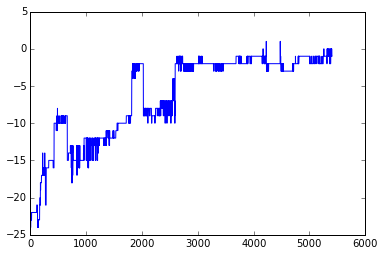

In [52]:
plt.plot(ranktraj)

In [46]:
ranktraj[-100:].mean()

-1.02

In [48]:
ranktraj.max()

8

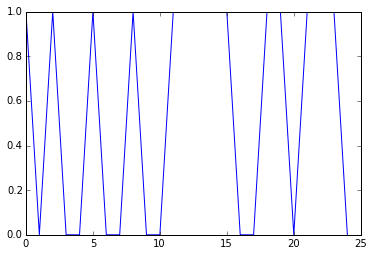

In [69]:
plt.plot(mywin[:25])

In [75]:
streak=[1]
current = mywin[0]
print current
for i in mywin[1:]:
    if i==current:
        streak[-1]+=1
    else:
        i=current
        streak.append(1)

1


In [76]:
len(mywin),len(ranktraj)

(5402, 5402)

In [79]:
wins=[j for i,j in enumerate(streak) if i%2==0]
losses=[j for i,j in enumerate(streak) if i%2==1]

In [80]:
max(wins)

15

In [81]:
max(losses)

12

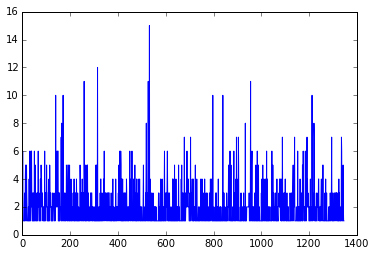

In [83]:
plt.plot(wins)

In [85]:
np.mean(wins),np.mean(losses)

(2.0252600297176819, 1.9895910780669146)

In [87]:
GetKey(sgf,'HA') in range(25)

False

In [95]:
handis=[int(i) for i in handis]

(array([ 481.,  259.,  139.,   64.,   55.,   12.,   12.,   57.]),
 array([ 2.   ,  2.875,  3.75 ,  4.625,  5.5  ,  6.375,  7.25 ,  8.125,  9.   ]),
 <a list of 8 Patch objects>)

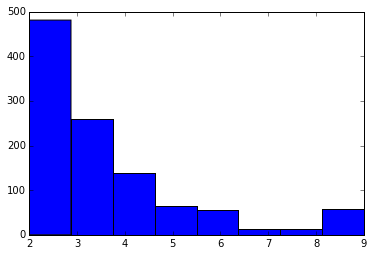

In [99]:
plt.hist(handis,bins=8)

In [97]:
set(handis)

{2, 3, 4, 5, 6, 7, 8, 9}